# Dielectric spheres

In [1]:
using LinearAlgebra
using Images
using FileIO

In [2]:
include("../src/Raytracing.jl")
using .Raytracing

In [3]:
# image dimensions (pixel)
nx = 200
ny = 100;

In [4]:
# define camera
lookfrom = zeros(3)
lookat = [0., 0., -1.]
vup = [0., 1., 0.]
vfov = π/2
aperture = 0
focus_dist = 1
camera = Camera(lookfrom, lookat, vup, vfov, nx / ny, aperture, focus_dist);

In [5]:
# define scene geometry
scene = SurfaceAssembly([])
push!(scene.objects, Sphere([ 0., 0., -1.], 0.5, Lambertian([0.1, 0.2, 0.5])))
push!(scene.objects, Sphere([ 1., 0., -1.], 0.5, Metal([0.8, 0.6, 0.2], 1.0)))
# imitate hollow glass sphere
push!(scene.objects, Sphere([-1., 0., -1.],  0.5,  Dielectric(1.5)))
push!(scene.objects, Sphere([-1., 0., -1.], -0.45, Dielectric(1.5)))
# large "globe" sphere imitating ground floor
push!(scene.objects, Sphere([0., -100.5, -1.], 100., Lambertian([0.8, 0.8, 0.0])));

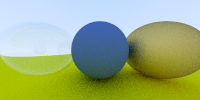

In [6]:
# number of samples (rays) per pixel
ns = 100

img = renderimage(nx, ny, ns, scene, camera)

# show rendered image
transpose(img)

In [7]:
# save to disk
save("dielectric_spheres.png", transpose(img))